# 202181042 임학수

## [중급, 조별] 신생아 이름 분석

* 미국사회보장국(United States Social Security Administration, SSA)은 매해 전체 출생에 대한 성별과 이름 정보 제공
* 1880년 부터 2014년간 수집된 데이터
* 연도별로 최소 5명 이상 중복되는 이름만 포함됨
* 해당 파일을 분석하여 아래의 분석 과제 진행

> <b>분석 과제 목록 </b><br><br>
    1. 연도별 출산 수를 구해 매년마다 얼마나 많은 수의 아기가 태어났는지 알아보기<br>
    2. 연도별로 남자, 여자 출산 수를 구해보기<br>
    3. 이름이 연도별로 차지하는 비율을 알아보기<br>
    4. 이름 유행 분석하기(연도별로 가장 많이 사용된 상위 1000개의 이름)  <br>
    5. 다양한 이름을 사용하는 경향 측정하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./0430_team/NationalNames.csv', encoding='UTF-8')
df.head()

# Id는 번호
# Name은 신생아 이름
# Year은 해당 신생아의 출생연도
# Gender는 남성(M), 여성(F)
# Count는 해당 이름을 가진 신생아의 수

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [3]:
df.shape

(1825433, 5)

In [4]:
# Id는 필요 없으므로 삭제
df.drop(columns='Id', inplace=True)

In [5]:
df

,Name,Year,Gender,Count
0,Mary,1880,F,7065
1,Anna,1880,F,2604
2,Emma,1880,F,2003
3,Elizabeth,1880,F,1939
4,Minnie,1880,F,1746
...,...,...,...,...
1825428,Zykeem,2014,M,5
1825429,Zymeer,2014,M,5
1825430,Zymiere,2014,M,5
1825431,Zyran,2014,M,5


## 1. 데이터 분석
### 1.1 연도별 신생아 숫자 (5점)
> <b>분석 과제 목록</b><br>
> 1. 연도별로 태어난 아기(신생아)의 숫자를 구하여 그래프로 그릴 것<br>
> ex. 1880년에는 201,484명의 아기가 탄생함<br>
> **ex.아래의 그래프 예시는 연도별로 태어난 신생아의 누계를 그린 것**

In [6]:
df_birth = pd.DataFrame(df.groupby('Year')['Count'].sum())

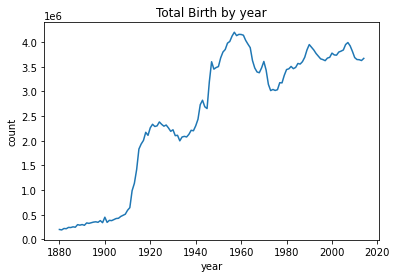

In [7]:
plt.plot(df_birth)
plt.title('Total Birth by year')
plt.xlabel('year')
plt.ylabel('count')
plt.show()

### 1.2 연도별 + 성별 출산수 (10점)
> <b>분석 과제 목록</b><br>
> 1. 연도별로 태어난 아기(신생아)의 숫자를 구하되, 성별을 구분하여 그래프로 출력할 것<br>
> ex. 1880년에는 남자 110,491명, 여자 90,993명이 태어남<br>
> **ex. 아래의 그래프 예시는 매해 태어난 신생아 숫자를 성별로 구분하여 그린 것**

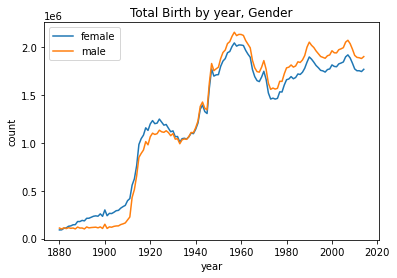

In [8]:
#1
df_gender = pd.DataFrame(df['Count'].groupby([df['Year'], df['Gender']]).sum())
df_gender = df_gender.unstack()

plt.plot(df_gender, label=('female','male'))
plt.title('Total Birth by year, Gender')
plt.xlabel('year')
plt.ylabel('count')
plt.legend()
plt.show()

<AxesSubplot:title={'center':'Total births by Year, Gender'}, xlabel='Year'>

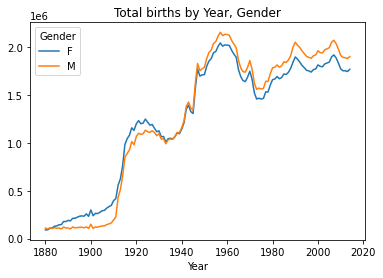

In [9]:
#2
total = df.pivot_table('Count', index='Year', columns='Gender', aggfunc=sum)
total.plot(title='Total births by Year, Gender')

### 1.3 각 이름이 연도별로 차지하는 비율(10점)
> <b>분석 과제 목록</b><br>
> 1. 연도별로 태어난 아기(신생아)의 숫자를 구하되, 성별을 구분한다<br>
> 2. 성별마다 각 이름이 해당 연도에 전체 이름중에 차지하는 비율을 구한다<br>
>    ex1. 1880년에는 여자이름 Mary는 7.7%의 비율을 차지한다 <br>
>    ex2. 1880년에는 남자이름 John은 8.7%의 비율을 차지한다 <br>
> 3. 비율은 prop이라는 열(column)을 만들고, 그 열에 이름별 연도별로 차지한 비율을 계산해 넣는다 <br>
> 4. 위의 요건을 충족하는 데이터프레임을 만드는 코드를 작성할 것<br>
> **ex.아래의 예시는 1880년에 남자와 여자 신생아의 이름이 차지하는 비율(prop)을 보여준다.**

In [10]:
def add_prop(group):
    group['prop'] = group.Count / group.Count.sum()
    return group
df = df.groupby(['Year', 'Gender']).apply(add_prop)
df
# df = pd.DataFrame(df['Count'].groupby(['Year', 'Gender']).apply(add_prop))
# df

,Name,Year,Gender,Count,prop
0,Mary,1880,F,7065,0.077643
1,Anna,1880,F,2604,0.028618
2,Emma,1880,F,2003,0.022013
3,Elizabeth,1880,F,1939,0.021309
4,Minnie,1880,F,1746,0.019188
...,...,...,...,...,...
1825428,Zykeem,2014,M,5,0.000003
1825429,Zymeer,2014,M,5,0.000003
1825430,Zymiere,2014,M,5,0.000003
1825431,Zyran,2014,M,5,0.000003


In [11]:
df.groupby(['Year', 'Gender']).prop.sum()

Year  Gender
1880  F         1.0
      M         1.0
1881  F         1.0
      M         1.0
1882  F         1.0
               ... 
2012  M         1.0
2013  F         1.0
      M         1.0
2014  F         1.0
      M         1.0
Name: prop, Length: 270, dtype: float64

In [12]:
def get_top1000(group):
    return group.sort_values(by='Count', ascending=False)[:1000]
grouped = df.groupby(['Year', 'Gender'])
top1000 = grouped.apply(get_top1000)
# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)

In [13]:
top1000

,Name,Year,Gender,Count,prop
0,Mary,1880,F,7065,0.077643
1,Anna,1880,F,2604,0.028618
2,Emma,1880,F,2003,0.022013
3,Elizabeth,1880,F,1939,0.021309
4,Minnie,1880,F,1746,0.019188
...,...,...,...,...,...
269872,Ayan,2014,M,207,0.000109
269873,Ean,2014,M,206,0.000108
269874,Leif,2014,M,205,0.000108
269875,Reagan,2014,M,205,0.000108


In [35]:
# top1880_F = top1000.loc[top1000["Year"]==1880]
top1880_F = top1000.loc[(top1000["Year"]==1880) & (top1000["Gender"]=="F")]
top1880_F

,Name,Year,Gender,Count,prop
0,Mary,1880,F,7065,0.077643
1,Anna,1880,F,2604,0.028618
2,Emma,1880,F,2003,0.022013
3,Elizabeth,1880,F,1939,0.021309
4,Minnie,1880,F,1746,0.019188
...,...,...,...,...,...
937,Georgina,1880,F,5,0.000055
938,Genie,1880,F,5,0.000055
939,Etter,1880,F,5,0.000055
940,Estie,1880,F,5,0.000055


### 1.4 이름 유행 분석(10점)
전체 데이터셋과 상위 1000개 데이터로 이름 분석
> <b>분석 과제 목록</b><br>
> 1. 다음의 남자, 여자 신생아 이름이 있다고 가정한다<br>
    ```
    boys_names = ['James', 'John', 'David']
    girls_names = ['Linda', 'Mary']
    ```
> 2. 성별마다 각 이름이 해당 연도에 전체 이름중에 차지하는 비율을 구한다<br>
> 3. 비율은 prop이라는 열(column)을 만들고, 그 열에 이름별 연도별로 차지한 비율을 계산해 넣는다 <br>
> 4. 위의 요건을 충족하는 데이터프레임을 만드는 코드를 작성할 것. <br>
> ** 5. 그 다음에 만든 데이터프레임을 그래프로 그릴 것**<br>
> *아래의 예시는 위의 1-5의 조건을 충족하면 볼 수 있는 그래프이다

In [15]:
boys_names = ['James', 'John', 'David']
girls_names = ['Linda', 'Mary']

In [16]:
boys = top1000[top1000.Gender == 'M']
girls = top1000[top1000.Gender == 'F']

In [17]:
total_births = top1000.pivot_table('prop', index='Year', columns='Name', aggfunc=sum)

array([<AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
       <AxesSubplot:xlabel='Year'>], dtype=object)

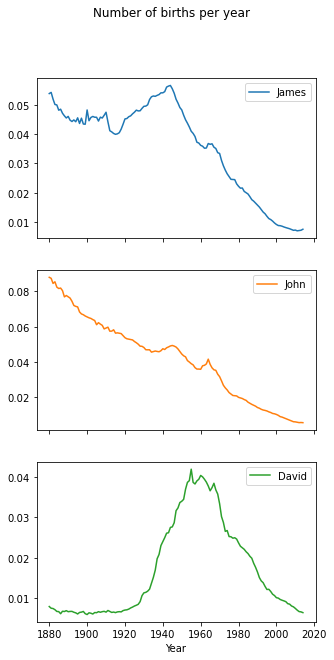

In [18]:
subset = total_births[boys_names]
subset.plot(subplots=True, figsize=(5, 10), grid=False, title="Number of births per year")

array([<AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>],
      dtype=object)

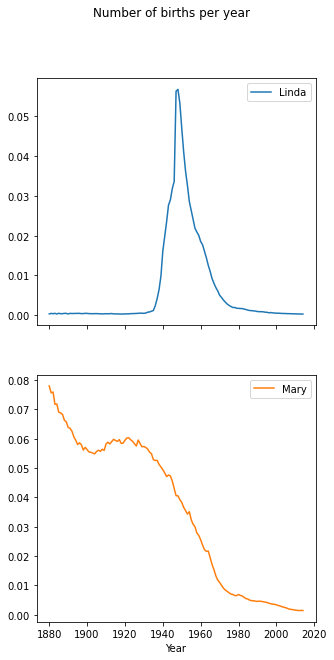

In [19]:
subset = total_births[girls_names]
subset.plot(subplots=True, figsize=(5, 10), grid=False, title="Number of births per year")

### 1.5 다양한 이름을 사용하는 경향 측정하기 (15점)
> <b>분석 과제 목록</b><br>
> 1. 위의 문제(1.4 문제 그래프)에서 확인한 감소 추세는 부모가 아이의 이름을 지을 때 흔한 이름은 피하는 것으로 분석가능<br>
> 2. 매해 가장 많이 사용된 이름 1000개가 매해 이름에서 차지하는 비율을 연도/성별 그래프로 그려 볼 것<br>
> **ex. 아래 그래프는 위의 1,2조건을 만족하면 생성할 수 있는 그래프 예시이다**

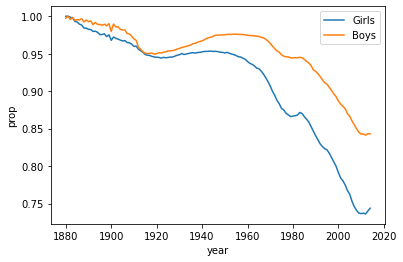

In [20]:
# 1
table = pd.DataFrame(top1000['prop'].groupby([top1000['Year'], top1000['Gender']]).sum())
table = table.unstack()

plt.plot(table, label=('Girls','Boys'))
plt.xlabel('year')
plt.ylabel('prop')
plt.legend()
plt.show()

<AxesSubplot:title={'center':'Sum of table1000.prop by year and sex'}, xlabel='Year'>

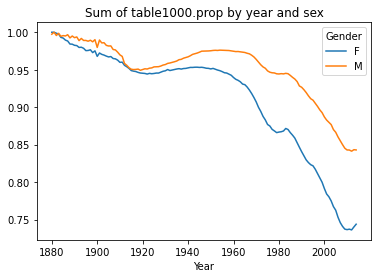

In [21]:
#2
table = top1000.pivot_table('prop', index='Year', columns='Gender', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0.75, 1.0, 6), xticks=range(1880, 2020, 20))

In [22]:
boys

,Name,Year,Gender,Count,prop
942,John,1880,M,9655,0.087383
943,William,1880,M,9532,0.086269
944,James,1880,M,5927,0.053642
945,Charles,1880,M,5348,0.048402
946,George,1880,M,5126,0.046393
...,...,...,...,...,...
269872,Ayan,2014,M,207,0.000109
269873,Ean,2014,M,206,0.000108
269874,Leif,2014,M,205,0.000108
269875,Reagan,2014,M,205,0.000108


In [23]:
girls

,Name,Year,Gender,Count,prop
0,Mary,1880,F,7065,0.077643
1,Anna,1880,F,2604,0.028618
2,Emma,1880,F,2003,0.022013
3,Elizabeth,1880,F,1939,0.021309
4,Minnie,1880,F,1746,0.019188
...,...,...,...,...,...
268872,Belen,2014,F,263,0.000149
268873,Cambria,2014,F,263,0.000149
268874,Natalya,2014,F,263,0.000149
268875,Kaelynn,2014,F,262,0.000148


In [24]:
total_births

Name,Aaden,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
Year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,0.000923,NaN,NaN,NaN,NaN,NaN,...,0.000088,0.000253,NaN,NaN,0.000077,NaN,0.000088,0.000308,0.000297,NaN
1881,NaN,NaN,NaN,NaN,0.000933,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000239,NaN,NaN,0.000109,NaN,0.000098,0.000228,0.000294,NaN
1882,NaN,NaN,NaN,NaN,0.000748,NaN,NaN,NaN,NaN,NaN,...,0.000074,0.000232,NaN,NaN,0.000083,NaN,0.000158,0.000297,0.000195,NaN
1883,NaN,NaN,NaN,NaN,0.001004,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000205,NaN,NaN,0.000089,NaN,0.000098,0.000312,0.000223,NaN
1884,NaN,NaN,NaN,NaN,0.000848,NaN,NaN,NaN,NaN,NaN,...,0.000101,0.000240,NaN,NaN,0.000109,0.000052,0.000062,0.000450,0.000209,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,0.000235,0.002627,NaN,0.000229,0.003893,0.000119,NaN,0.000159,NaN,0.000169,...,NaN,0.003532,0.002933,0.000287,NaN,NaN,NaN,NaN,NaN,0.000146
2011,0.000145,0.002911,NaN,0.000230,0.004017,NaN,NaN,NaN,NaN,0.000164,...,NaN,0.003588,0.003645,0.000298,NaN,NaN,NaN,NaN,NaN,0.000179
2012,0.000118,0.003133,NaN,0.000230,0.003974,NaN,NaN,NaN,NaN,NaN,...,NaN,0.003669,0.004249,0.000294,NaN,NaN,NaN,NaN,NaN,0.000247
